<a href="https://colab.research.google.com/github/valenmonsalveu/Int_Artificial_Proyecto/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Competencia kaggle**
- Descargar la base de datos desde Kaggle


In [ ]:
# Instrucciones para descargar y configurar el dataset desde Kaggle:
# 1. Obtén tu archivo kaggle.json desde tu cuenta de Kaggle:
#    - Ir a Kaggle > Cuenta > Crear nuevo API Token.
#    - Esto descargará un archivo kaggle.json en tu computadora.
#
# 2. Sube el archivo kaggle.json a Google Colab usando el siguiente código:
from google.colab import files
files.upload()

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242


Saving kaggle.json to kaggle.json
 84% 17.0M/20.1M [00:01<00:00, 27.3MB/s]
100% 20.1M/20.1M [00:01<00:00, 18.8MB/s]


In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


**inspeccion de datos**

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


**cargar la base de datos train.csv con pandas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

z.head()

shape of loaded dataframe (692500, 12)


ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0            Estrato 3                 Si    Técnica o tecnológica incompleta   
1            Estrato 3                 No      Técnica o tecnológica completa   
2            Estrato 3                 Si  Secundaria (Bachillerato) completa   
3            Estrato 4                 Si                             No sabe   
4            Estrato 3                 Si                   Primaria completa   

                  FAMI_EDUCACIONMADRE ESTU_PAGOMATRICULAPROPIO  \
0                           Postgrado                       No   
1    Técnica o tecnológica incompleta                       No   
2  Secundaria (Bachillerato) completa                       No   
3  Secundaria (Bachillerato) completa                       No   
4                   Primaria completa                       No   

  RENDIMIENTO_GLOBAL  
0         medio-alto  
1               bajo  
2               bajo  
3               alto  
4         medio-bajo

**Exploracion de datos**

In [ ]:
# 1. Información general sobre el dataframe
print("\nInformación general del dataframe:")
print(z.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object

# Modelo utilizando 2 columnas
Inspeccionar visualmente si el estrato y el departamento tienen un comportamiento distintivo con respecto a lo que queremos predecir.

In [ ]:
!pip install rlxutils
#Modelo utilizando 2 columnas
#Inspeccionar visualmente si el estrato y el departamento tienen un comportamiento distintivo con respecto a lo que queremos predecir.





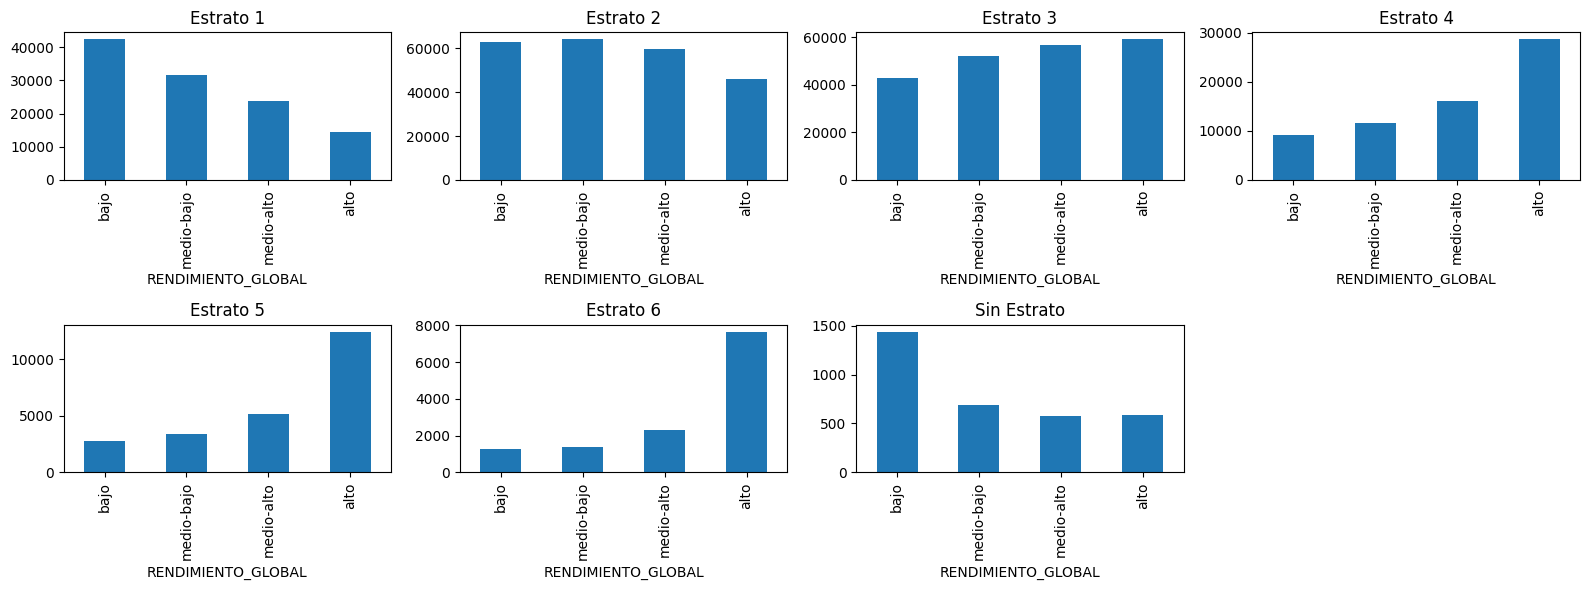

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

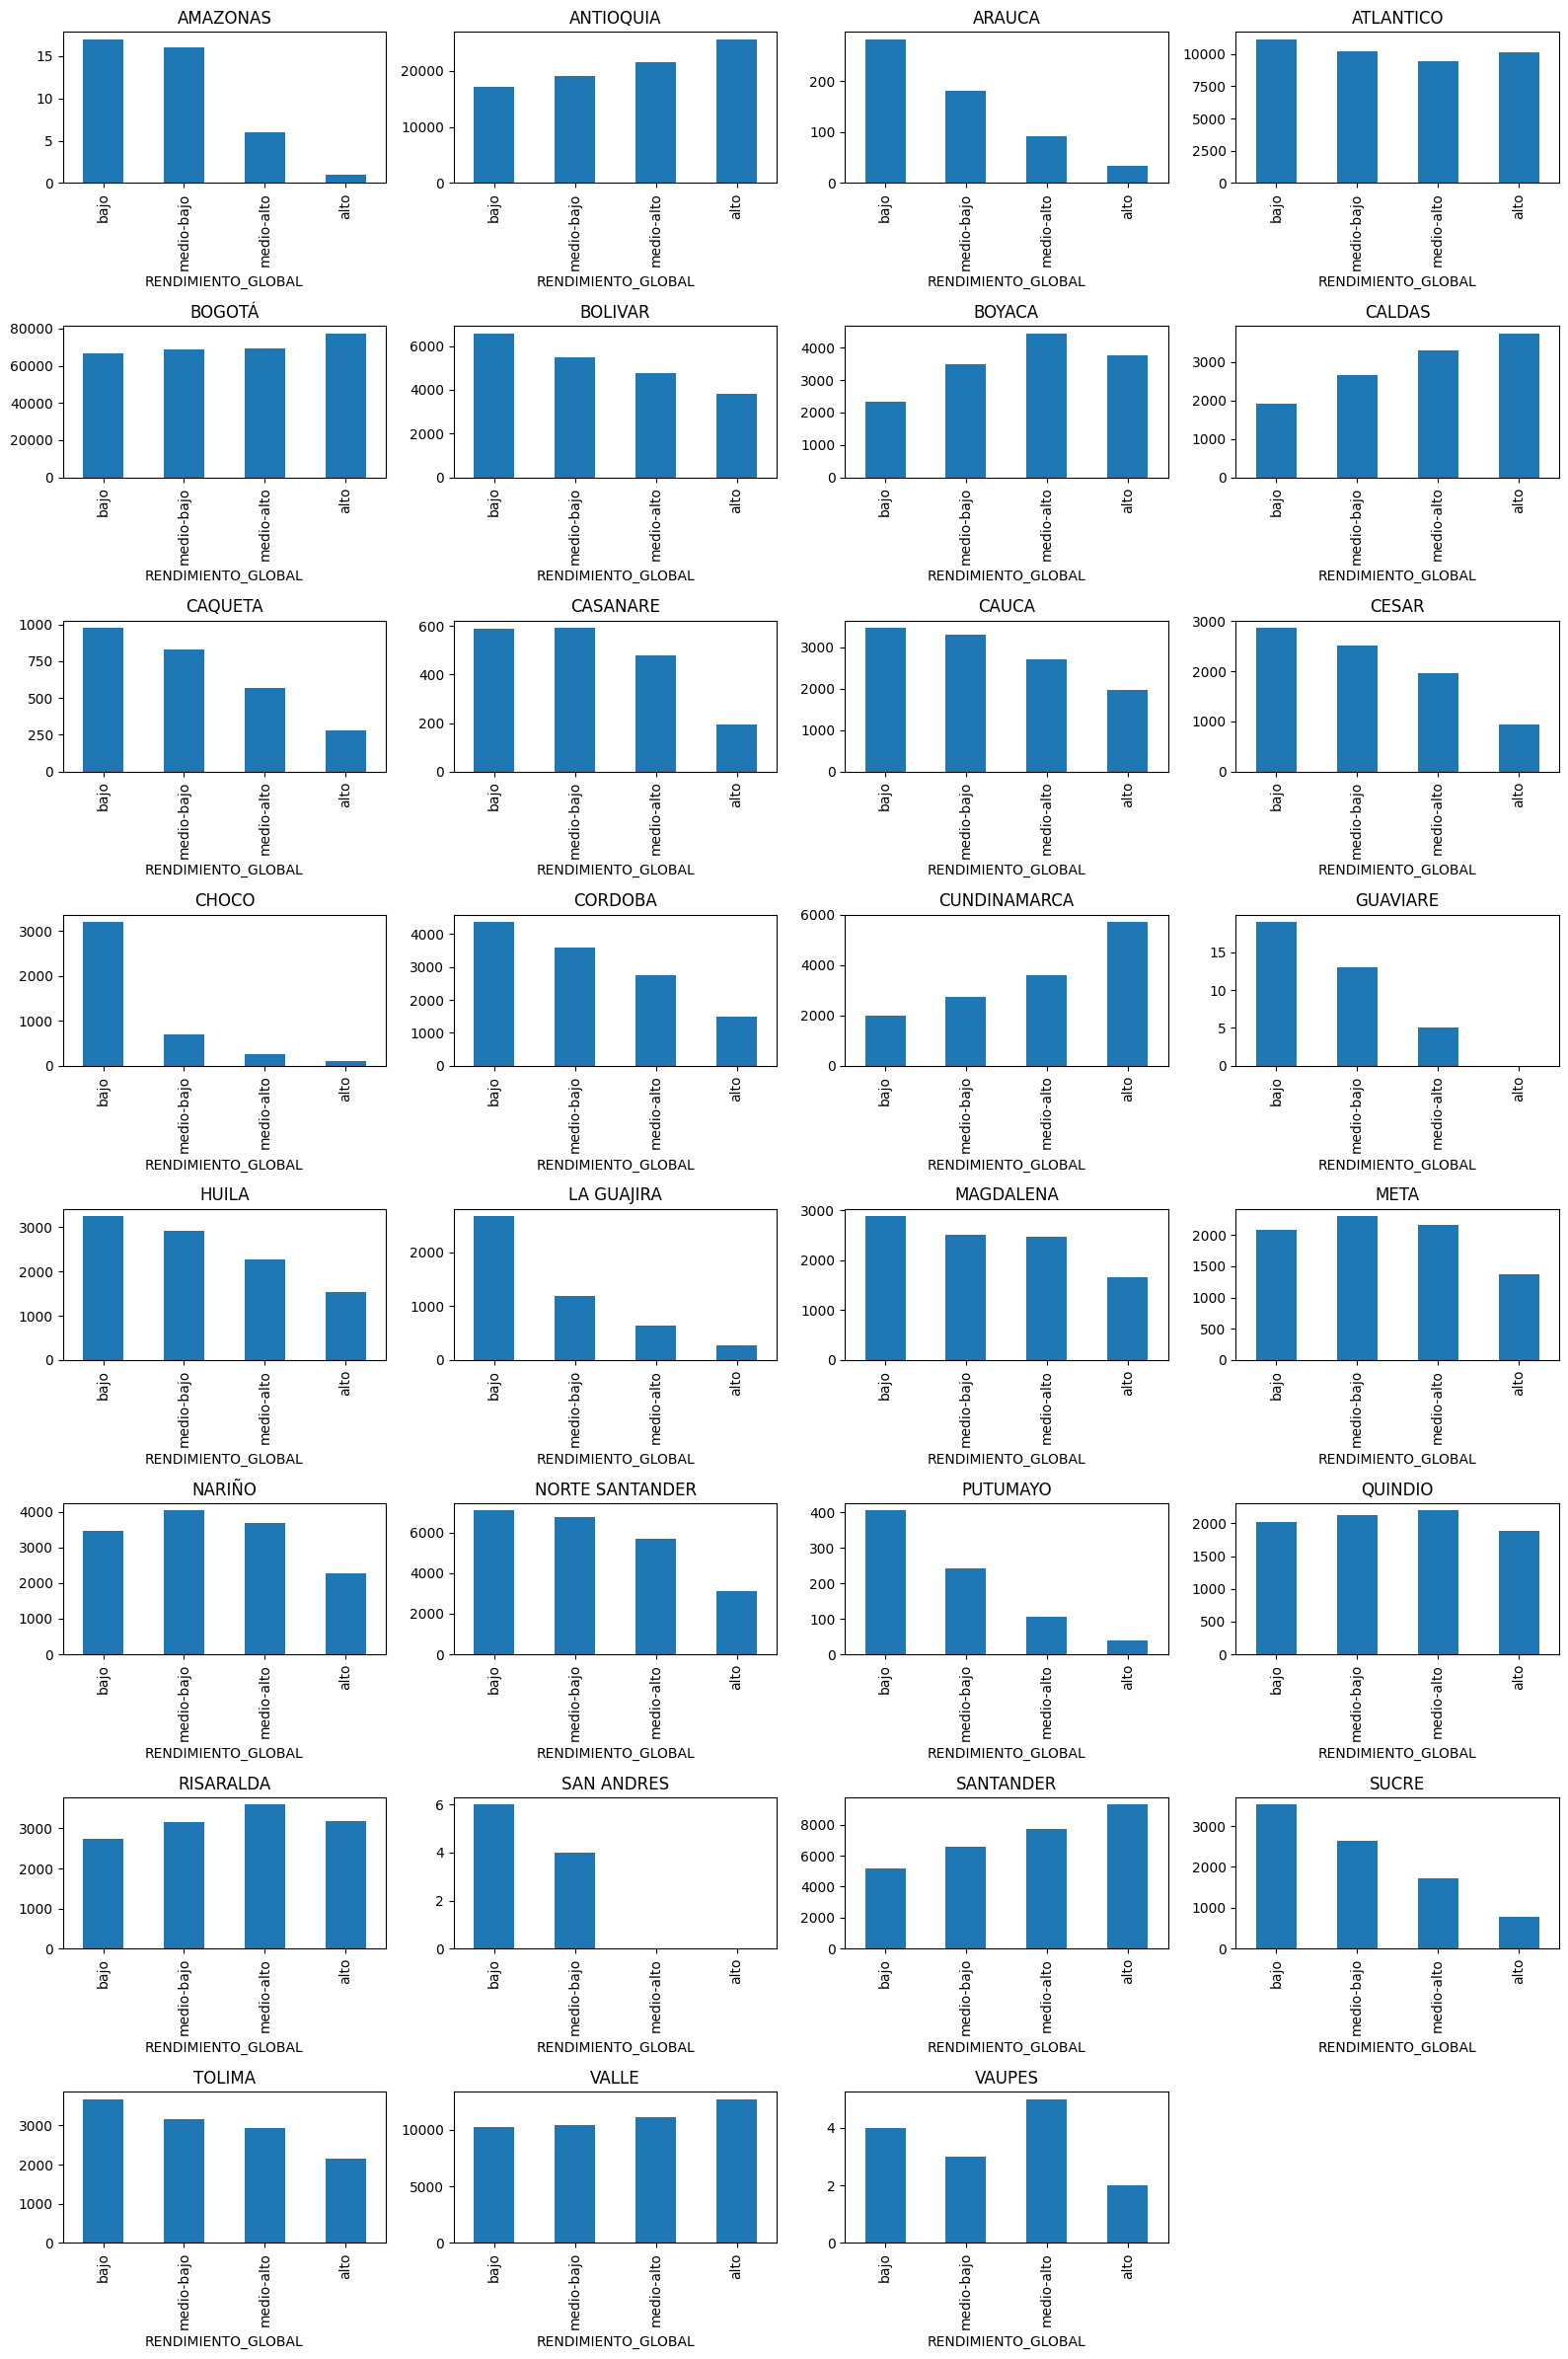

In [ ]:
c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]
    # Obtener el valor contable de RENDIMIENTO_GLOBAL
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()
    # Indexar nuevamente la serie de valore incluyendo las categorias deseadas
    # Rellenando los datos faltantes con  0
    categories = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
    counts = counts.reindex(categories, fill_value=0)
    counts.plot(kind='bar', ax=ax) # Plotting on the provided ax
    plt.title(ci)

# modelo utilizando FAMI_ESTRATOVIVIENDA y ESTU_PRGM_DEPARTAMENTO
Tenemos que predecir la columna RENDIMIENTO_GLOBALusando el resto.

usaremos columnas


*   FAMI_ESTRATOVIVIENDA necesitaremos convertir a una codificación continua
*   ESTU_PRGM_DEPARTAMENTO  necesitaremos convertir a una codificación onehot




In [ ]:
z = z[['FAMI_ESTRATOVIVIENDA', 'ESTU_PRGM_DEPARTAMENTO', 'RENDIMIENTO_GLOBAL']]
z.head()

FAMI_ESTRATOVIVIENDA ESTU_PRGM_DEPARTAMENTO RENDIMIENTO_GLOBAL
0            Estrato 3                 BOGOTÁ         medio-alto
1            Estrato 3              ATLANTICO               bajo
2            Estrato 3                 BOGOTÁ               bajo
3            Estrato 4              SANTANDER               alto
4            Estrato 3              ANTIOQUIA         medio-bajo

# Limpieza básica


In [ ]:
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.ESTU_PRGM_DEPARTAMENTO.isna())

(32137, 0)

Sustituiremos nanlos valores con un símbolo preestablecido para marcarlos.

In [ ]:
z.ESTU_PRGM_DEPARTAMENTO.values[z.ESTU_PRGM_DEPARTAMENTO.isna()] = 'no info'
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.ESTU_PRGM_DEPARTAMENTO.isna())

(0, 0)

# Limpieza de FAMI_ESTRATOVIVIENDA

In [ ]:
cmap = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0,
    'no info': -1
}
z.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in z.FAMI_ESTRATOVIVIENDA]]
z.FAMI_ESTRATOVIVIENDA.value_counts()

FAMI_ESTRATOVIVIENDA
 2    232671
 3    210685
 1    111991
 4     65514
-1     32137
 5     23608
 6     12605
 0      3289
Name: count, dtype: int64

# Limpieza ESTU_PRGM_DEPARTAMENTO


In [ ]:
#Preprocesado de ESTU_PRGM_DEPARTAMENTO (one-hot encoding)
# Convertimos los valores categóricos únicos en one-hot encoding
x = z.ESTU_PRGM_DEPARTAMENTO.values
ESTU_PRGM_DEPARTAMENTO_vals = sorted(np.unique(x))
ESTU_PRGM_DEPARTAMENTO_onehot_vals = {val: np.eye(len(ESTU_PRGM_DEPARTAMENTO_vals))[i] for i, val in enumerate(ESTU_PRGM_DEPARTAMENTO_vals)}

# Aplicamos la codificación one-hot a cada valor en la columna ESTU_PRGM_DEPARTAMENTO
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in z.ESTU_PRGM_DEPARTAMENTO]]

# Convertimos la matriz resultante en un DataFrame para añadir al DataFrame original
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(
    ESTU_PRGM_DEPARTAMENTO_onehot_enc,
    columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_vals]
)

# Concatenamos el DataFrame con el original y eliminamos la columna original de ESTU_PRGM_DEPARTAMENTO
z = pd.concat([ESTU_PRGM_DEPARTAMENTO_df, z], axis=1).drop('ESTU_PRGM_DEPARTAMENTO', axis=1)

# Comprobamos la nueva forma del DataFrame y visualizamos las primeras filas
z.shape
z.head()

ESTU_PRGM_DEPARTAMENTO__AMAZONAS  ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                1.0   

   ESTU_PRGM_DEPARTAMENTO__ARAUCA  ESTU_PRGM_DEPARTAMENTO__ATLANTICO  \
0                             0.0                                0.0   
1                             0.0                                1.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   

   ESTU_PRGM_DEPARTAMENTO__BOGOTÁ  ESTU_PRGM_DEPARTAMENTO__BOLIVAR  \
0                             1.0                              0.0   
1                             0.0                              0.0   
2                             1.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   ESTU_PRGM_DEPARTAMENTO__BOYACA  ESTU_PRGM_DEPARTAMENTO__CALDAS  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   ESTU_PRGM_DEPARTAMENTO__CAQUETA  ESTU_PRGM_DEPARTAMENTO__CASANARE  ...  \
0                              0.0                               0.0  ...   
1                              0.0                               0.0  ...   
2                              0.0                               0.0  ...   
3                              0.0                               0.0  ...   
4                              0.0                               0.0  ...   

   ESTU_PRGM_DEPARTAMENTO__QUINDIO  ESTU_PRGM_DEPARTAMENTO__RISARALDA  \
0                              0.0                                0.0   
1                              0.0                                0.0   
2                              0.0                                0.0   
3                              0.0                                0.0   
4                              0.0                                0.0   

   ESTU_PRGM_DEPARTAMENTO__SAN ANDRES  ESTU_PRGM_DEPARTAMENTO__SANTANDER  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                1.0   
4                                 0.0                                0.0   

   ESTU_PRGM_DEPARTAMENTO__SUCRE  ESTU_PRGM_DEPARTAMENTO__TOLIMA  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   ESTU_PRGM_DEPARTAMENTO__VALLE  ESTU_PRGM_DEPARTAMENTO__VAUPES  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   FAMI_ESTRATOVIVIENDA  RENDIMIENTO_GLOBAL  
0                     3          medio-alto  
1                   

# Convertir la columna de destino (predicción) en valores discretos
Ahora todo en nuestro conjunto de datos es numérico

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

ESTU_PRGM_DEPARTAMENTO__AMAZONAS  ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                1.0   

   ESTU_PRGM_DEPARTAMENTO__ARAUCA  ESTU_PRGM_DEPARTAMENTO__ATLANTICO  \
0                             0.0                                0.0   
1                             0.0                                1.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   

   ESTU_PRGM_DEPARTAMENTO__BOGOTÁ  ESTU_PRGM_DEPARTAMENTO__BOLIVAR  \
0                             1.0                              0.0   
1                             0.0                              0.0   
2                             1.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   ESTU_PRGM_DEPARTAMENTO__BOYACA  ESTU_PRGM_DEPARTAMENTO__CALDAS  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   ESTU_PRGM_DEPARTAMENTO__CAQUETA  ESTU_PRGM_DEPARTAMENTO__CASANARE  ...  \
0                              0.0                               0.0  ...   
1                              0.0                               0.0  ...   
2                              0.0                               0.0  ...   
3                              0.0                               0.0  ...   
4                              0.0                               0.0  ...   

   ESTU_PRGM_DEPARTAMENTO__QUINDIO  ESTU_PRGM_DEPARTAMENTO__RISARALDA  \
0                              0.0                                0.0   
1                              0.0                                0.0   
2                              0.0                                0.0   
3                              0.0                                0.0   
4                              0.0                                0.0   

   ESTU_PRGM_DEPARTAMENTO__SAN ANDRES  ESTU_PRGM_DEPARTAMENTO__SANTANDER  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                1.0   
4                                 0.0                                0.0   

   ESTU_PRGM_DEPARTAMENTO__SUCRE  ESTU_PRGM_DEPARTAMENTO__TOLIMA  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   ESTU_PRGM_DEPARTAMENTO__VALLE  ESTU_PRGM_DEPARTAMENTO__VAUPES  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   FAMI_ESTRATOVIVIENDA  RENDIMIENTO_GLOBAL  
0                     3                   2  
1                   

Dificultades:
Decidir qué variables son más importantes para el rendimiento fue difícil. Por ejemplo, no está claro si factores como el departamento académico del estudiante (ESTU_PRGM_DEPARTAMENTO) influyen significativamente en el rendimiento.
Aún estamos en proceso de realizar análisis exploratorios más profundos y ajustar la importancia de las variables antes de construir modelos predictivos.



A medida que se avanza en el preprocesamiento, surgen más decisiones sobre cómo imputar, transformar y normalizar los datos, lo que requiere tiempo y experimentación.
Probablemente enfrentemos nuevas dificultades a medida que integremos modelos predictivos, pero estamos aprendiendo a lidiar con los datos de manera más eficiente.